In [1]:
!pip install zfit==0.5.6 
!pip install mplhep

  Using cached zfit-0.5.6-py2.py3-none-any.whl (264 kB)
  Using cached tensorflow_probability-0.11.0-py2.py3-none-any.whl (4.3 MB)
  Using cached iminuit-1.5.4-cp38-cp38-manylinux2010_x86_64.whl (4.2 MB)
  Using cached tensorflow-2.3.4-cp38-cp38-manylinux2010_x86_64.whl (320.7 MB)
  Using cached cloudpickle-1.3.0-py2.py3-none-any.whl (26 kB)
  Using cached h5py-2.10.0-cp38-cp38-manylinux1_x86_64.whl (2.9 MB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached numpy-1.18.5-cp38-cp38-manylinux1_x86_64.whl (20.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: h5py
  

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#ls drive/MyDrive/colab2021/scripts

In [4]:
# Following https://stackoverflow.com/a/64604031
import sys

from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "py")

if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
! pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [6]:
! pip install numpy==1.21.5 --user

     |████████████████████████████████| 15.7 MB 7.6 MB/s eta 0:00:01    |████████▋                       | 4.2 MB 1.7 MB/s eta 0:00:07
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.4 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.5 which is incompatible.


In [7]:
#sys.path.append('drive/MyDrive/colab2021/scripts')
import matplotlib.pyplot as plt
import plot_tools
import zfit
import customPDFs
import numpy as np
import pandas as pd

/home/carlos/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [8]:
#Create the new space, model and parameters

In [9]:
print(np.__version__)

1.21.5


In [10]:
import matplotlib

In [11]:
#! pip show matplotlib
print(matplotlib.__version__)

3.5.2


In [12]:
cos = zfit.Space('cosThetaKMu', [-1,1])

In [13]:
AFB = zfit.Parameter('AFB', 0)
FH = zfit.Parameter('FH', 0.002)

In [14]:
decay_rate = customPDFs.decayWidth(AFB, FH, cos)

In [15]:
cos_np = np.linspace(-1, 1, 1000)

Text(1, 0, '$\\cos\\theta_{\\ell}$')

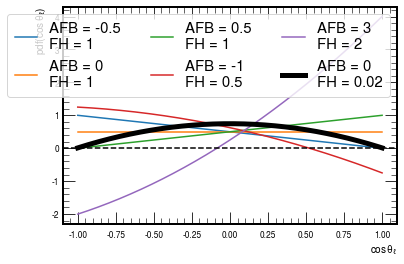

In [16]:
for afb,fh in zip([-0.5, 0, 0.5, -1, 3], 
                     [1, 1,   1,0.5, 2]):
  AFB.set_value(afb)
  FH.set_value(fh)
  plt.plot(cos_np, decay_rate.pdf(cos_np), label=f'AFB = {afb}\nFH = {fh}')


AFB.set_value(0), FH.set_value(0.02)
plt.plot(cos_np, decay_rate.pdf(cos_np), label=f'AFB = {0}\nFH = {0.02}', linewidth=5, color='black', ls='-')

plt.legend(frameon=True, ncol=3, fontsize=15)
plt.axhline(0, color='black', ls='--')
plt.ylabel(r'pdf($\cos\theta_{\ell}$)')
plt.xlabel(r'$\cos\theta_{\ell}$')

In [17]:
AFB.set_value(0), FH.set_value(0.02)
#AFB.set_value(0), FH.set_value(1)
sampler = decay_rate.create_sampler(100000)
sampler.resample()

(array([ 846., 2225., 3266., 4246., 5296., 6013., 6387., 6773., 7310.,
        7431., 7365., 7298., 6999., 6528., 5878., 5242., 4486., 3412.,
        2180.,  819.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

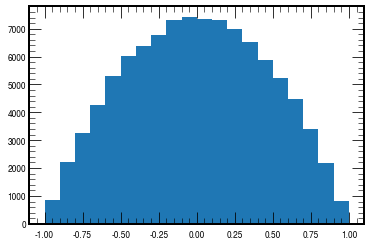

In [18]:
plt.hist(sampler.numpy(), bins=20, range=[-1,1])

/home/carlos/Ayudantia/py/plot_tools.py:692: UserWarning: The function <function Space.limit1d at 0x7f433268d9d0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('cosThetaKMu',), axes=(0,), limits=(array([[-1.]]), array([[1.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  limits = pdf.norm_range.limit1d


'decayWidth' object has no attribute 'models'


(array([ 846., 2225., 3266., 4246., 5296., 6013., 6387., 6773., 7310.,
        7431., 7365., 7298., 6999., 6528., 5878., 5242., 4486., 3412.,
        2180.,  819.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

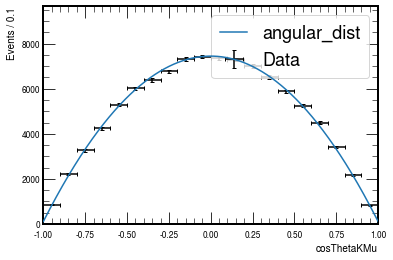

In [19]:
plot_tools.plot_model(sampler.numpy(), decay_rate, 
                      bins=20, density=True)

In [20]:
# Declared this variable
sampler.resample()
º = sampler.numpy()

In [21]:
# No tiene subclase float64 en este caso, posiblemente por el sistema operativo o hardware
np.float

<ipython-input-21-0e53fe452964>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.float


float

'decayWidth' object has no attribute 'models'


((array([ 870., 2077., 3228., 4359., 5199., 6005., 6430., 6945., 7313.,
         7367., 7480., 7260., 7078., 6554., 6066., 5107., 4378., 3387.,
         2101.,  796.]),
  array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
          0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])),
 22.054894361270065)

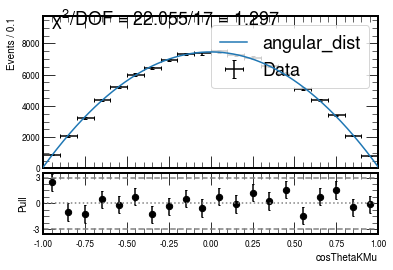

In [22]:
from matplotlib._api import check_in_list
fig = plt.figure()
axes = plot_tools.create_axes_for_pulls(fig)
plot_tools.plot_model(º, decay_rate, bins=20, 
                  axis=axes[0], pulls=True, axis_pulls=axes[1], 
                  chi_x=0.02, chi_y=0.9)

In [23]:
import SLSQP_zfit

In [24]:
decay_rate.params

OrderedDict([('AFB', <zfit.Parameter 'AFB' floating=True value=0>),
             ('FH', <zfit.Parameter 'FH' floating=True value=0.02>)])

In [25]:
constraints = SLSQP_zfit.create_constraint(decay_rate)
SLSQP = SLSQP_zfit.SLSQP(constraints=constraints)

0 1
ftol not in minizer_options


In [26]:
nll = zfit.loss.UnbinnedNLL(decay_rate, sampler)

In [32]:
nll.get_params()

OrderedSet([<zfit.Parameter 'AFB' floating=True value=-0.0005202>, <zfit.Parameter 'FH' floating=True value=0.02058>])

<zfit.decayWidth  params=[AFB, FH] dtype=float64>0

In [27]:
nll.value()

<tf.Tensor: shape=(), dtype=float64, numpy=57428.74026589775>

In [28]:
MIN = zfit.minimize.Minuit()
minimum = MIN.minimize(nll)
minimum.hesse()

/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all(np.equal(self.immutable_representation, other.immutable_representation))


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 5.743e+04                  │         Nfcn = 24 (24 total)         │
│ EDM = 3.44e-05 (Goal: 0.001)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


OrderedDict([(<zfit.Parameter 'AFB' floating=True value=-0.0005226>,
              {'error': 0.0014064631214360803}),
             (<zfit.Parameter 'FH' floating=True value=0.0206>,
              {'error': 0.0032328855910023872})])

In [29]:
minimum = SLSQP.minimize(nll)

# Correr el programa a ver si funciona en Linux

minimum.hesse()

/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:236: RuntimeWarning: Exception occurred, parameter values are not reset and in an arbitrary, last used state. If this happens during normal operation, make sure you reset the values.
  warnings.warn("Exception occurred, parameter values are not reset and in an arbitrary, last"


NotImplementedError: Cannot convert a symbolic Tensor (gradients/gradients/AddN_16/inputs_1_grad/sub:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
minimum

In [ ]:
minuit = zfit.minimize.Minuit()
minimum_minuit = minuit.minimize(nll)
minimum_minuit.hesse()

In [ ]:
minimum_minuit

In [ ]:
minimum

In [ ]:
from matplotlib._api import check_in_list
fig = plt.figure()
axes = plot_tools.create_axes_for_pulls(fig)
plot_tools.plot_model(sampler.numpy(), decay_rate, bins=20, 
                  axis=axes[0], pulls=True, axis_pulls=axes[1], 
                chi_x=0.02, chi_y=0.9, print_params=minimum, 
                data_kwargs = {'capsize': 3, 'color': 'black', 'ms':3, 'marker':'s'},
                params_text_opts={'x':0.4, 'y':0.2, 'ncol':1, 'fontsize': 15})
#axes[0].set_yscale('log')
#axes[0].set_ylim(1e5, 1e6)